# Predicting and Understanding Happiness Scores in Various Countries

**The Main Goal is:**

* To analyse and visualise relationships between the independent variable (such as Freedom, Health, Corruption etc.) and the Happiness Score in the world. I will also explore the happiness score at different granularities like country or region.
* Identify correlation between independent variables (if any).
* To try and predict which variables impact the most the Happiness Score.
* Combine datasets with Happiness related variables from the years 2015 to 2020 to draw deeper conclusions.



**Data Source:**

* Data World Happiness Report (https://www.kaggle.com/mathurinache/world-happiness-report).




**Motivation:**

* Bhutan is a small country in Asia and it introduced the Gross National Happiness (GNP) to the world. Bhutan is also a developing country with a lower income economy which makes you think that a country’s Gross Domestic Product (GDP) is not the only factor that creates happiness within a civilization. 
* This research will determine which variables were the most impactful when it comes to countries' happiness scores.


In [60]:
!pip install sklearn
!pip install shap

## Importing Relevant Libraries: 

In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import os
import datetime as dt
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap

# Sklearn imports
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

## Data Cleaning / Organisation

In [62]:
h_2015 = pd.read_csv('2015.csv')
h_2016 = pd.read_csv('2016.csv')
h_2017 = pd.read_csv('2017.csv')
h_2018 = pd.read_csv('2018.csv')
h_2019 = pd.read_csv('2019.csv')
h_2020 = pd.read_csv('2020.csv')

In [63]:
h_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [64]:
h_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [65]:
h_2015["Year"] = 2015
h_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


The dataset 2015 has no null values.

In [66]:
h_2016["Year"] = 2016
h_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [67]:

h_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

The dataset has no null values but does not have the Standard Error column that the 2015 dataset has. 




In [68]:
h_2017["Year"] = 2017
h_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [69]:
h_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [70]:
#Renaming columns to match other datasets
h_2017 = h_2017.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Whisker.high' : 'Upper Confidence Interval', 'Whisker.low' : 'Lower Confidence Interval', 'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.': 'Health (Life Expectancy)','Trust..Government.Corruption.': 'Trust (Government Corruption)', 'Dystopia.Residual': 'Dystopia Residual' })
h_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness Rank                 155 non-null    int64  
 2   Happiness Score                155 non-null    float64
 3   Upper Confidence Interval      155 non-null    float64
 4   Lower Confidence Interval      155 non-null    float64
 5   Economy (GDP per Capita)       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health (Life Expectancy)       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust (Government Corruption)  155 non-null    float64
 11  Dystopia Residual              155 non-null    float64
 12  Year                           155 non-null    int

In [71]:
h_2017.head()

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017




The dataset has no null values but does not have the Standard Error and the Region column that the 2015 dataset has. 

In [72]:
h_2018["Year"] = 2018
h_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [73]:
h_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
 9   Year                          156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [74]:
#Renaming columns to match other datasets
h_2018 = h_2018.rename(columns={'Freedom to make life choices':'Freedom','Social support':'Family','Overall rank': 'Happiness Rank','Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)','Perceptions of corruption': 'Trust (Government Corruption)'})

#We have one null value for 'Trust (Government Corruption)' so we replaced it with the mean of this column for further analysis 
h_2018['Trust (Government Corruption)'] = h_2018['Trust (Government Corruption)'].fillna((h_2018['Trust (Government Corruption)'].mean()))
h_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Family                         156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
 9   Year                           156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


This dataset does not have the rows: Upper Confidence Interval, Lower Confidence Interval, and Dystopia Residual.



In [75]:
h_2019["Year"] = 2019
h_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [76]:
h_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
 9   Year                          156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


In [77]:
#Renaming columns to match other datasets
h_2019 = h_2019.rename(columns={'Freedom to make life choices':'Freedom','Social support':'Family','Overall rank': 'Happiness Rank','Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)','Perceptions of corruption': 'Trust (Government Corruption)'})
h_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 156 non-null    int64  
 1   Country                        156 non-null    object 
 2   Happiness Score                156 non-null    float64
 3   Economy (GDP per Capita)       156 non-null    float64
 4   Family                         156 non-null    float64
 5   Health (Life Expectancy)       156 non-null    float64
 6   Freedom                        156 non-null    float64
 7   Generosity                     156 non-null    float64
 8   Trust (Government Corruption)  156 non-null    float64
 9   Year                           156 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.3+ KB


This dataset does not have the rows: Upper Confidence Interval, Lower Confidence Interval, and Dystopia Residual.

In [78]:
h_2020["Year"] = 2020
h_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020


In [79]:
h_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [80]:
#Renaming columns to match other datasets
h_2020 = h_2020.rename(columns={'Logged GDP per capita':'Economy (GDP per Capita)','Dystopia + residual':'Dystopia Residual','lowerwhisker': 'Lower Confidence Interval','upperwhisker': 'Upper Confidence Interval', 'Regional indicator': 'Region', 'Standard error of ladder score': 'Standard Error','Country name': 'Country', 'Ladder score': 'Happiness Score','Freedom to make life choices':'Freedom','Social support':'Family','Overall rank': 'Happiness Rank','Country or region': 'Country', 'Score': 'Happiness Score', 'GDP per capita' : 'Economy (GDP per Capita)', 'Healthy life expectancy': 'Health (Life Expectancy)','Perceptions of corruption': 'Trust (Government Corruption)'})
h_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     153 non-null    object 
 1   Region                                      153 non-null    object 
 2   Happiness Score                             153 non-null    float64
 3   Standard Error                              153 non-null    float64
 4   Upper Confidence Interval                   153 non-null    float64
 5   Lower Confidence Interval                   153 non-null    float64
 6   Economy (GDP per Capita)                    153 non-null    float64
 7   Family                                      153 non-null    float64
 8   Health (Life Expectancy)                    153 non-null    float64
 9   Freedom                                     153 non-null    float64
 10  Generosity    

## Exploratory Data Analysis


### 2015

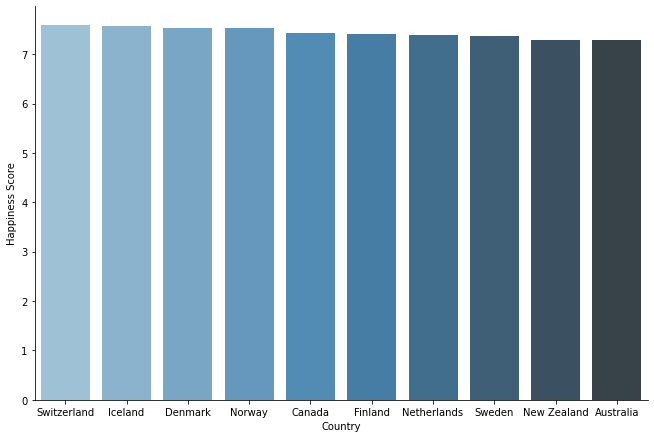

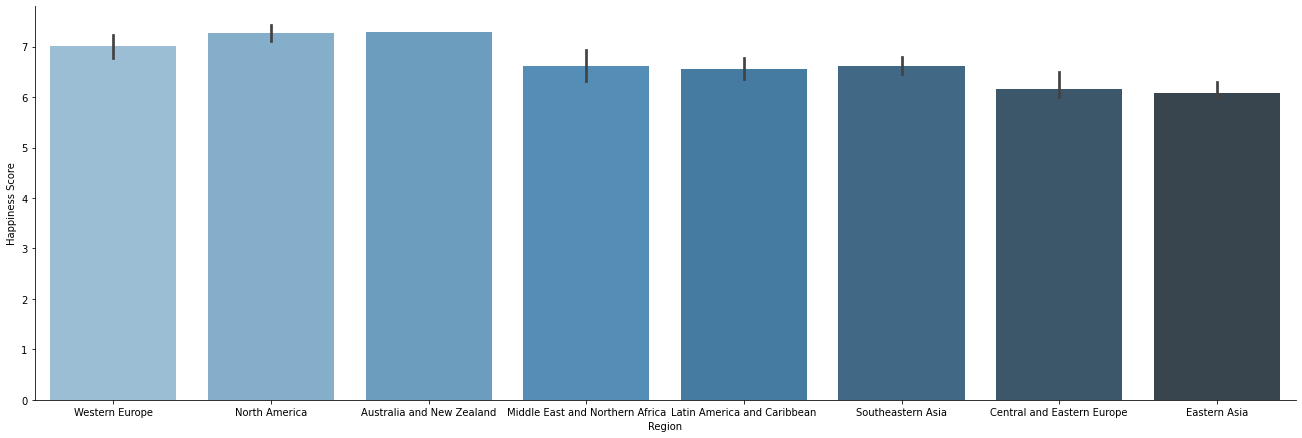

In [81]:
h_2015_top = h_2015.head(10)
sns.catplot(data=h_2015_top, x='Country', y='Happiness Score', kind='bar',
            palette = "Blues_d", height=6, aspect=1.5)

h_2015_top = h_2015.head(50)
sns.catplot(data=h_2015_top, x='Region', y='Happiness Score', kind='bar',
            palette = "Blues_d", height=6, aspect=3)

In 2015, Switzerland, Iceland, and Denmark are the three countries with the highest Happiness Score with scores of 7.587,	7.561, and	7.527. These three countries are part of Western Europe. Also, within the 50 countries that ranked the highest in the Happiness Score, most of them are located in North America, Australia and New Zealand, followed by Western Europe. 	

In [82]:
h_2015_top.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


### 2016

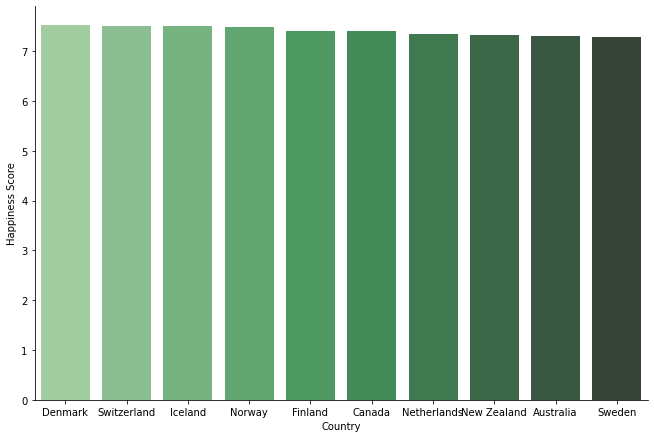

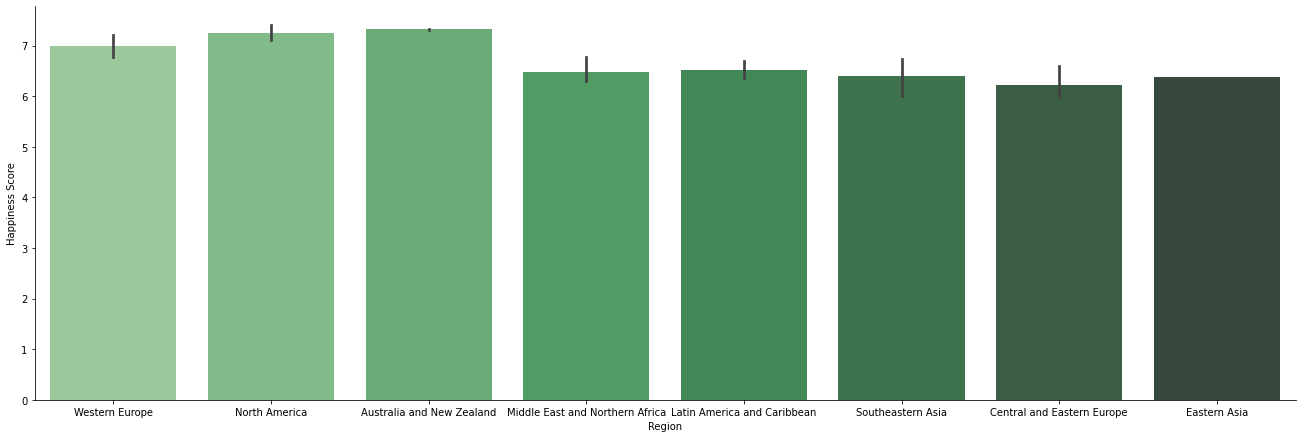

In [83]:
h_2016_top = h_2016.head(10)
sns.catplot(data=h_2016_top, x='Country', y='Happiness Score', kind='bar',
            palette = "Greens_d", height=6, aspect=1.5)

h_2016_top = h_2016.head(50)
sns.catplot(data=h_2016_top, x='Region', y='Happiness Score', kind='bar',
            palette = "Greens_d", height=6, aspect=3)

In 2016, Switzerland, Iceland, and Denmark are still the three countries with the highest Happiness Score but in a different order. This time, Denmark has a higher happiness score than Switzerland with a with scores of 7.526 for Denmark, 7.509 for Switzerland, and 7.501 for Iceland. These three countries are part of Western Europe. Furthermore, within the 50 countries that ranked the highest in the Happiness Score, most of them are located in Australia and new Zealand, North America, followed by Western Europe. 

In [84]:
h_2016_top.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


### 2017

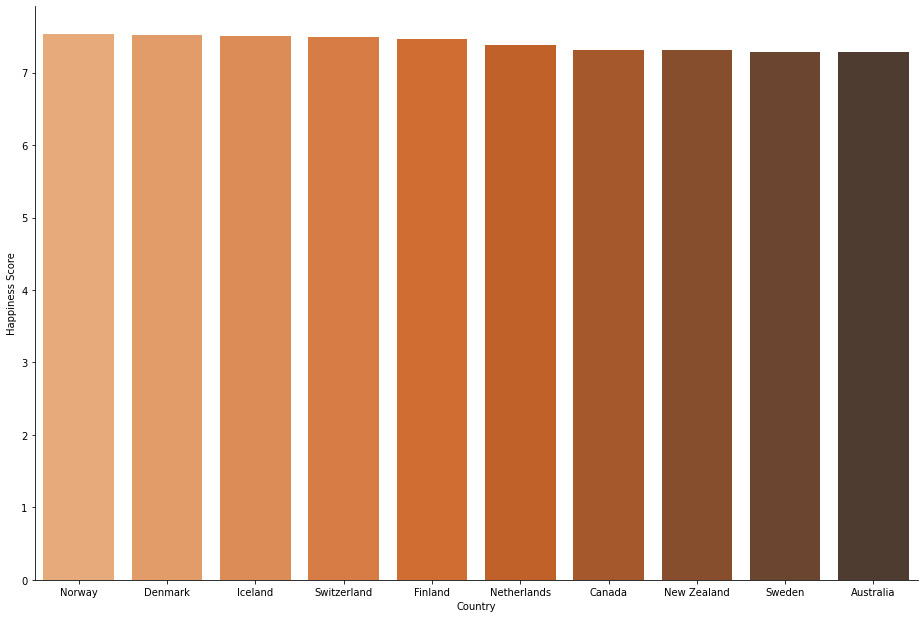

In [85]:
h_2017_top = h_2017.head(10)
sns.catplot(data=h_2017_top, x='Country', y='Happiness Score', kind='bar',
            palette = "Oranges_d", height=8.5, aspect=1.5)

# The dataset for 2017 does not have the 'Region" column 

In 2017, Switzerland lost its place in the top 3 happiest countries and has been replaced by Norway which went straight to the first position with a score of 7.537, followed by Denmark and Iceland with respective scores of 7.522 and 7.504. 

In [86]:
h_2017_top.head()

,Country,Happiness Rank,Happiness Score,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


### 2018

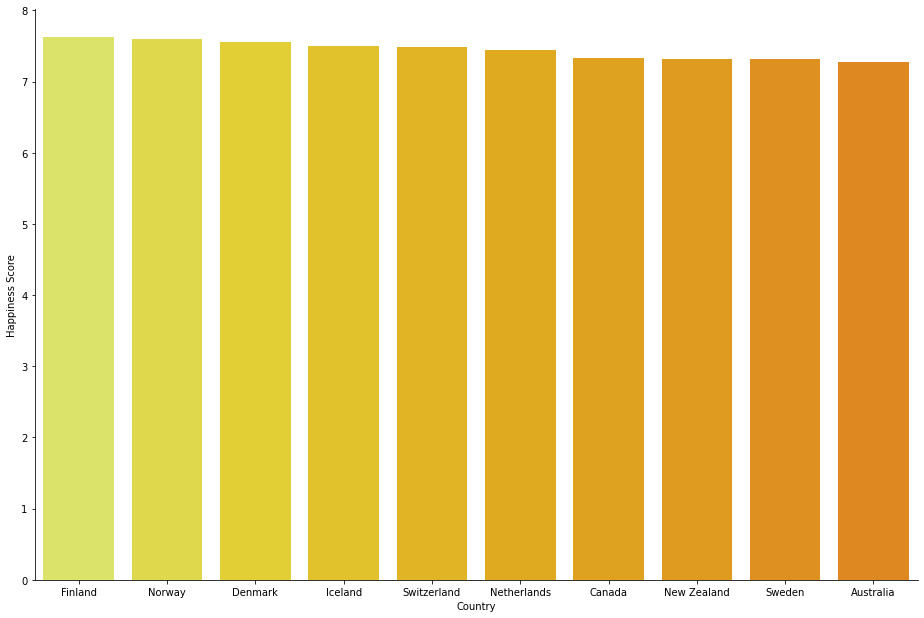

In [87]:
h_2018_top = h_2018.head(10)
sns.catplot(data=h_2018_top, x='Country', y='Happiness Score', kind='bar',
            palette = "Wistia", height=8.5, aspect=1.5)

Once again, a country that was not in the top 3 went straight to first place. Finland is the happiest country in 2018 with a happiness score if 7.632 followed by Norway and Denmark with respective scores of 7.594 and 7.555. 

In [88]:
h_2018_top.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


### 2019

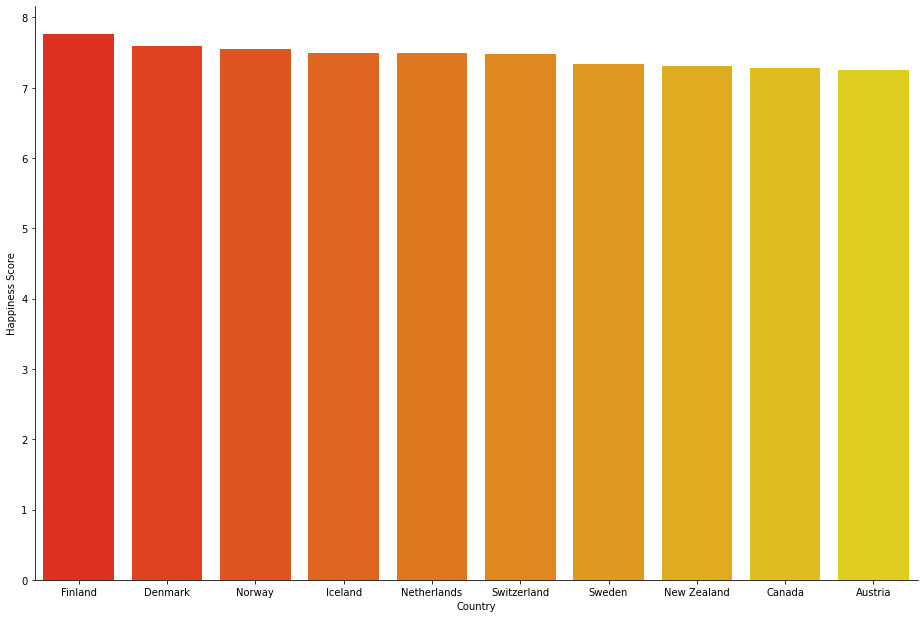

In [89]:
h_2019_top = h_2019.head(10)
sns.catplot(data=h_2019_top, x='Country', y='Happiness Score', kind='bar',
            palette = "autumn", height=8.5, aspect=1.5)

Norway lost another place in 2019 to Denmark and Finland kept its first place with a score of 7.769 and Denmark and Norway with scores of 7.600 and 7.554.

In [90]:
h_2019_top.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


### 2020

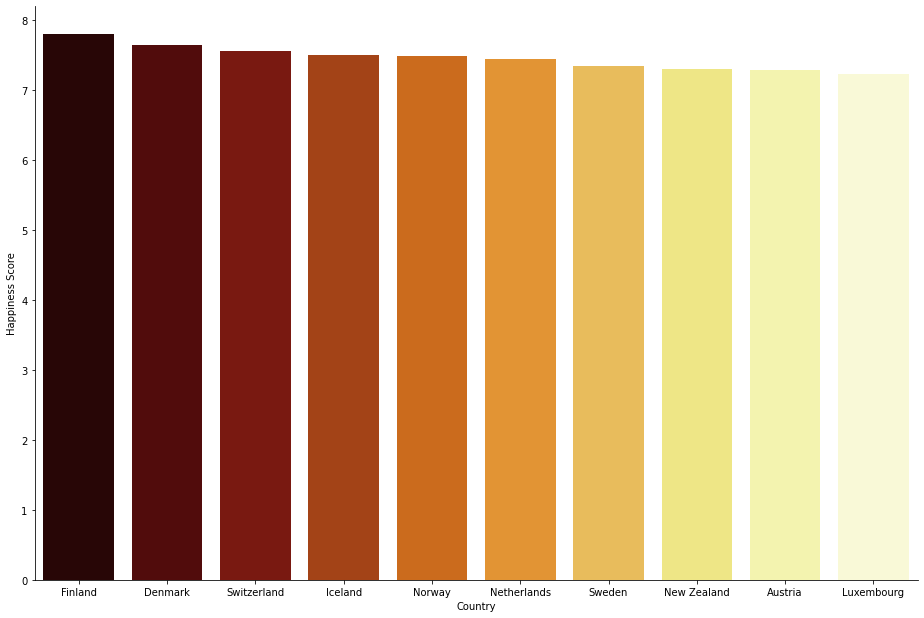

In [91]:
h_2020_top = h_2020.head(10)
sns.catplot(data=h_2020_top, x='Country', y='Happiness Score', kind='bar',
            palette = "afmhot", height=8.5, aspect=1.5)

In 2020, Norway lost 3 places and is now the 5th happiest country and Finland kept its first place with a score of 7.808 and is still followed by Denmark but now also followed by Switzerland with respective scores of 7.646 and 7.560.

In [92]:
h_2020_top.head()

,Country,Region,Happiness Score,Standard Error,Upper Confidence Interval,Lower Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia Residual,Year
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,2020
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2020
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,2020
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,2020
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,2020


###Combination

Creating a dataset with years from 2015 to 2020, thus, only keeping the columns and rows that are present on all years 

In [93]:
model_2015 = h_2015.drop(columns=['Region', 'Standard Error',  'Dystopia Residual'])
model_2016 = h_2016.drop(columns=['Region', 'Upper Confidence Interval', 'Lower Confidence Interval' , 'Dystopia Residual'])
model_2017 = h_2017.drop(columns=['Upper Confidence Interval', 'Lower Confidence Interval' , 'Dystopia Residual'])
model_2018 = h_2018.copy()
model_2019 = h_2019.copy()
model_2020 = h_2020.drop(columns = ['Explained by: Perceptions of corruption','Explained by: Log GDP per capita','Explained by: Generosity','Explained by: Freedom to make life choices','Explained by: Healthy life expectancy','Explained by: Social support','Region', 'Standard Error', 'Upper Confidence Interval', 'Lower Confidence Interval', 'Ladder score in Dystopia' , 'Dystopia Residual'])

We did not have a "Happiness Rank" in the model_2020 dataset so we created it. Since the rows are already ordered, we only had to add their index numbers near them.

In [94]:
model_2020['Happiness Rank'] = range(1, len(model_2020)+1)
model_2020.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Happiness Rank
0,Finland,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,2020,1
1,Denmark,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,2020,2
2,Switzerland,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,2020,3
3,Iceland,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,2020,4
4,Norway,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,2020,5


In [95]:
final = model_2015.append(model_2016)
final = final.append(model_2017)
final = final.append(model_2018)
final = final.append(model_2019)
final = final.append(model_2020)
final.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [96]:
final.tail()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
148,Central African Republic,149,3.4759,6.625160,0.319460,45.200001,0.640881,0.891807,0.082410,2020
149,Rwanda,150,3.3123,7.600104,0.540835,61.098846,0.900589,0.183541,0.055484,2020
150,Zimbabwe,151,3.2992,7.865712,0.763093,55.617260,0.711458,0.810237,-0.072064,2020
151,South Sudan,152,2.8166,7.425360,0.553707,51.000000,0.451314,0.763417,0.016519,2020
152,Afghanistan,153,2.5669,7.462861,0.470367,52.590000,0.396573,0.933687,-0.096429,2020


In [97]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 152
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        935 non-null    object 
 1   Happiness Rank                 935 non-null    int64  
 2   Happiness Score                935 non-null    float64
 3   Economy (GDP per Capita)       935 non-null    float64
 4   Family                         935 non-null    float64
 5   Health (Life Expectancy)       935 non-null    float64
 6   Freedom                        935 non-null    float64
 7   Trust (Government Corruption)  935 non-null    float64
 8   Generosity                     935 non-null    float64
 9   Year                           935 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 80.4+ KB


We now have a final dataset we can use for further Exploratory Data Analysis (EDA) and modeling.

In [98]:
#final.to_csv('final_happiness.csv')

### Exploratory Data Analysis on Final Dataset 

**Looking at the final Dataset**

In [99]:
# Number of rows and columns
sh = final.shape
print("There are {} rows and {} columns.".format(sh[0], sh[1]))

There are 935 rows and 10 columns.


**Correlation Between features**

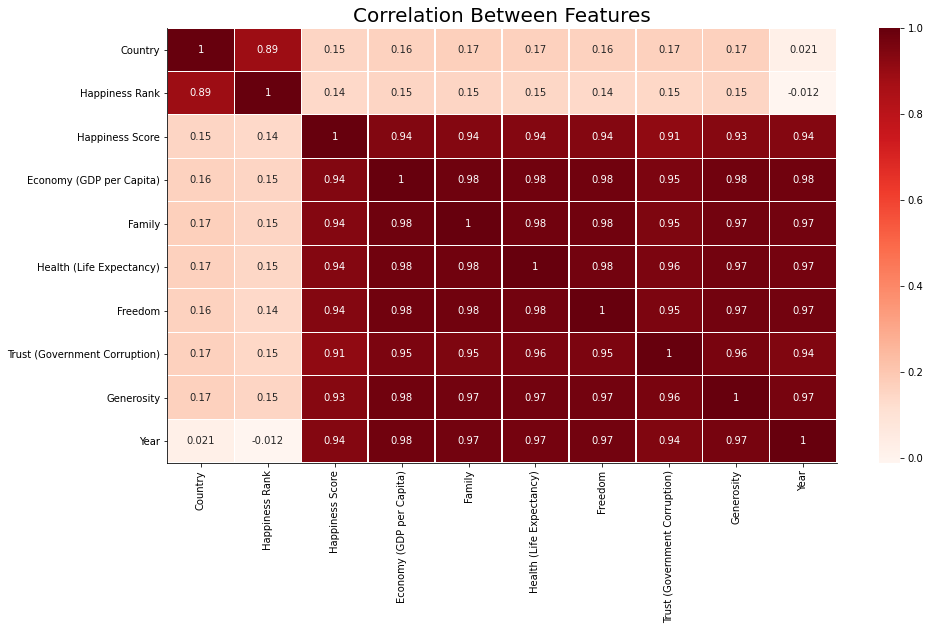

In [100]:
plt.figure(figsize=(15, 8))
corr = final.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="Reds", annot=True)
plt.title('Correlation Between Features', fontsize=20)
sns.despine();

Following this initial correlation feature heatmap, we can see that nearly all variables are stronly related with the Happiness Score.

**Which countries have the lowest Happiness Rank overall on average (which countries are on the top of the Happiness Rank)?**

In [101]:
final[final['Country'].notnull()].groupby('Country')['Happiness Rank'].mean().sort_values(ascending=True).head(8)

Country
Denmark        2.166667
Finland        3.166667
Norway         3.166667
Iceland        3.333333
Switzerland    3.500000
Netherlands    6.166667
Canada         7.500000
New Zealand    8.166667
Name: Happiness Rank, dtype: float64

Denmark is the country with the happiest people on average with an average happiness rank of 2.17, followed equally by Finland and Norway which both have a score of 3.17. 

**Creating a dataset with the 5 happiest countries over the years for further investigation**

In [102]:
final_top5 = final[(final.Country == "Switzerland") | (final.Country == "Finland")| (final.Country == "Denmark") | (final.Country == "Norway")| (final.Country == "Iceland")]
final_top5.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015


**Which countries have the highest Happiness Rank overall on average (which countries are on the bottom of the Happiness Rank)?**

In [103]:
final[final['Country'].notnull()].groupby('Country')['Happiness Rank'].mean().sort_values(ascending=False).head(8)

Country
Syria                       152.600000
Central African Republic    152.400000
Rwanda                      151.666667
Burundi                     151.500000
South Sudan                 150.400000
Tanzania                    150.333333
Afghanistan                 150.000000
Yemen                       146.333333
Name: Happiness Rank, dtype: float64

The country with the least happy people on average seems to be Syria with an average rank of 152.6, followed by Central African Republic and Rwanda with respective scores of 152.40 and 151.67. 

**Which countries have the lowest Freedom over the years on average?**




In [104]:
final[final['Country'].notnull()].groupby('Country')['Freedom'].mean().sort_values(ascending=True).head(8)

Country
Angola         0.027433
Sudan          0.032951
Syria          0.081700
Greece         0.161714
Haiti          0.164028
Afghanistan    0.164365
South Sudan    0.183399
Burundi        0.188825
Name: Freedom, dtype: float64

Angola, Sudan, and Syria are the three countries with the lowest Freedom score over the years on average with respective scores of .027, .033, and .082.

**Which countries have the highest Freedom over the years on average?**

In [105]:
final[final['Country'].notnull()].groupby('Country')['Freedom'].mean().sort_values(ascending=False).head(8)

Country
Maldives                     0.853963
Hong Kong S.A.R. of China    0.779834
Uzbekistan                   0.709156
Cambodia                     0.691510
Norway                       0.690999
Denmark                      0.680207
Finland                      0.676142
Iceland                      0.673177
Name: Freedom, dtype: float64

Maldives, Hong Kong, and Uzbekistan are the three countries with the highest Freedom score over the years on average with respective scores of .854, .780, and .710.

**Which countries have the lowest GDP per Capita over the years on average?**

In [106]:
final[final['Country'].notnull()].groupby('Country')['Economy (GDP per Capita)'].mean().sort_values(ascending=True).head(8)

Country
Somalia              0.005661
Somaliland region    0.188470
Somaliland Region    0.255580
Djibouti             0.440250
Sudan                0.604069
Syria                0.699109
Angola               0.798380
Bhutan               0.823507
Name: Economy (GDP per Capita), dtype: float64

Somalia, Djibouti, and Sudan are the three countries with the lowest GDP per Capita on average over the years with respective scores of .005, .440, and , 604.

**Which countries have the highest GDP per Capita over the years on average?**

In [107]:
final[final['Country'].notnull()].groupby('Country')['Economy (GDP per Capita)'].mean().sort_values(ascending=False).head(8)

Country
Hong Kong S.A.R. of China    10.934671
Maldives                      9.518633
Taiwan Province of China      6.104656
Gambia                        3.814907
North Cyprus                  3.568021
Swaziland                     3.561911
Trinidad and Tobago           3.539727
Luxembourg                    3.273176
Name: Economy (GDP per Capita), dtype: float64

Hong Kong, Maldives, and Taiwan are the three countries with the highest GDP per Capita on average over the years with respective scores of 10.935, 9.519, and 6.105.

## Modeling

In [108]:
# Function for metrics
def regression_results(y_true, y_pred):
    
    result = {}
    
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4)) 
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
    result['explained_variance'] = round(explained_variance,4)
    result['r2'] = round(r2,4)
    result['MAE'] = round(mean_absolute_error,4)
    result['MSE'] = round(mse,4)
    result['RMSE'] = round(np.sqrt(mse),4)
    
    return result

**Linear Regression**

In [109]:
# Split the data frame
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(final[[ 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)', 'Generosity', 'Year']],
                                                    final[['Happiness Score']], 
                                                    test_size=1 - train_ratio, 
                                                    random_state = 0)
# test is now 10% of the initial data set
# validation is now 15% of the initial data set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, 
                                                test_size=test_ratio/(test_ratio + validation_ratio), 
                                                random_state = 0)

In [110]:
# Fit the model
lr = LinearRegression()
lr.fit(x_train, y_train)
print(f'Intercept is: {lr.intercept_}')
print(f'Coefficient of the predictor is: {lr.coef_}')

# predicting and obtaining Metrics on the Train set
y_train_pred = lr.predict(x_train)
r1 = regression_results(y_train, y_train_pred)
# Predict on Validation set, metrics obtained on the validation set
y_val_pred = lr.predict(x_val)
r2 = regression_results(y_val, y_val_pred)
# Predict on testn set, metrics obtained on the test set
y_test_pred = lr.predict(x_test)
r2 = regression_results(y_test, y_test_pred)

Intercept is: [310.2884674]
Coefficient of the predictor is: [[ 0.95908788  1.58088016 -0.11273758  1.92945854 -0.51865652  0.77551442
  -0.15286337]]
explained_variance:  0.6751
r2:  0.6751
MAE:  0.5093
MSE:  0.4201
RMSE:  0.6481
explained_variance:  0.5945
r2:  0.5943
MAE:  0.5235
MSE:  0.4596
RMSE:  0.6779
explained_variance:  0.6125
r2:  0.6074
MAE:  0.5494
MSE:  0.4798
RMSE:  0.6927


**Ordinary Least Squares (OLS)**

In [111]:
# add constant column to the original dataframe
final['constant'] = 1 

# define x as a subset of original dataframe without Country (since it is a qualitative variable) and Happiness Rank (since it has a very strong correlation with Happiness Score)
x = final[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)','Freedom','Trust (Government Corruption)', 'Generosity', 'Year']]
                                                   
# define y as a series (Asset Intensity)
y = final[['Happiness Score']]

model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        Happiness Score   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              8728.
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:12:53   Log-Likelihood:                         -957.88
No. Observations:                 935   AIC:                                      1930.
Df Residuals:                     928   BIC:                                      1964.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

With the Ordinary Least Squares Method, it seems like all variables except the Trust (Government Corruption) are significant. 

The ones with the highest coefficient amongst these variables are the Economy (GDP per Capita), Family, and Freedom.

**Random Forest Regressor**

In [112]:
lr = RandomForestRegressor()
lr.fit(x_train, y_train)

# predicting and obtaining Metrics on the Train set
y_train_pred = lr.predict(x_train)
r1 = regression_results(y_train, y_train_pred)
# Predict on Validation set, metrics obtained on the validation set
y_val_pred = lr.predict(x_val)
r2 = regression_results(y_val, y_val_pred)
# Predict on testn set, metrics obtained on the test set
y_test_pred = lr.predict(x_test)
r2 = regression_results(y_test, y_test_pred)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


explained_variance:  0.9707
r2:  0.9707
MAE:  0.1482
MSE:  0.0378
RMSE:  0.1945
explained_variance:  0.7932
r2:  0.7932
MAE:  0.3841
MSE:  0.2343
RMSE:  0.484
explained_variance:  0.7635
r2:  0.76
MAE:  0.4433
MSE:  0.2933
RMSE:  0.5416


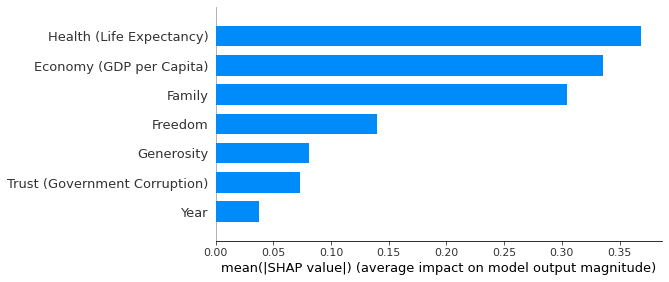

In [113]:
shap_values = shap.TreeExplainer(lr).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

 96%|=================== | 676/701 [00:17<00:00]       

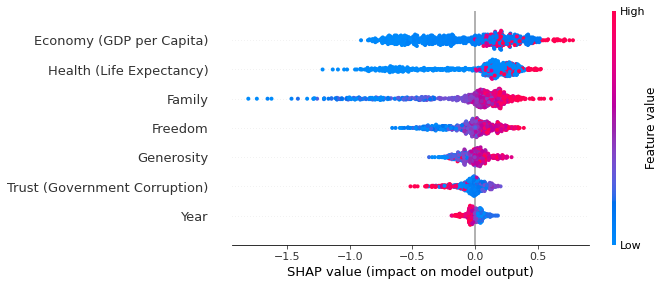

In [114]:
explainer = shap.Explainer(lr, x_train)
shap_values = explainer(x_train)

shap.plots.beeswarm(shap_values)

Feature: 0, Score: 0.26833
Feature: 1, Score: 0.20218
Feature: 2, Score: 0.32223
Feature: 3, Score: 0.07774
Feature: 4, Score: 0.05590
Feature: 5, Score: 0.06143
Feature: 6, Score: 0.01217


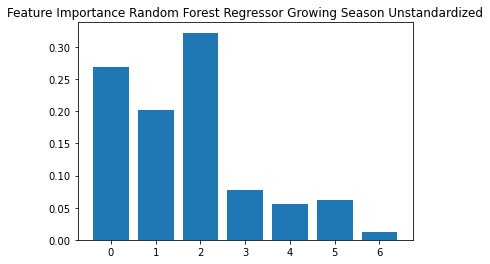

In [115]:
# get importance
importance = lr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Feature Importance Random Forest Regressor Growing Season Unstandardized")
plt.show()

**Kernel**

In [116]:
clf = KernelRidge(alpha=1.0)
clf.fit(x_train, y_train)
KernelRidge(alpha=1.0)

# Evaluating the model on the train set
y_pred_kernel = clf.predict(x_train)
regression_results(y_train, y_pred_kernel)
# Evaluating the model on the validation set 
y_pred_kernel = clf.predict(x_val)
regression_results(y_val, y_pred_kernel)
# Evaluating the model on the vtest set
y_pred_kernel = clf.predict(x_test)
regression_results(y_test, y_pred_kernel)

explained_variance:  0.6492
r2:  0.6492
MAE:  0.5275
MSE:  0.4535
RMSE:  0.6735
explained_variance:  0.5938
r2:  0.5923
MAE:  0.5182
MSE:  0.4619
RMSE:  0.6796
explained_variance:  0.6269
r2:  0.623
MAE:  0.5452
MSE:  0.4608
RMSE:  0.6788


{'MAE': 0.5452,
 'MSE': 0.4608,
 'RMSE': 0.6788,
 'explained_variance': 0.6269,
 'r2': 0.623}

**Bagging**

In [117]:
regr = BaggingRegressor(base_estimator=SVR(), n_estimators=7, random_state=0).fit(x_train, y_train)

# Evaluating the model on the train set
y_pred_bag = regr.predict(x_train)
regression_results(y_train, y_pred_bag)
# Evaluating the model on the validation set 
y_pred_bag = regr.predict(x_val)
regression_results(y_val, y_pred_bag)
# Evaluating the model on the vtest set
y_pred_bag = regr.predict(x_test)
regression_results(y_test, y_pred_bag)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


explained_variance:  0.0011
r2:  -0.0002
MAE:  0.9424
MSE:  1.2931
RMSE:  1.1372
explained_variance:  0.0006
r2:  -0.0247
MAE:  0.8798
MSE:  1.1608
RMSE:  1.0774
explained_variance:  0.0001
r2:  0.0001
MAE:  0.9523
MSE:  1.222
RMSE:  1.1054


{'MAE': 0.9523,
 'MSE': 1.222,
 'RMSE': 1.1054,
 'explained_variance': 0.0001,
 'r2': 0.0001}